In [144]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [182]:
def generate_linear_dataset(n_instances=100):
    X = np.random.rand(n_instances, 1) * 10 - 5
    y = 4 + 3 * X + np.random.randn(n_instances, 1) * 3
    return X, y

def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).sum() / len(y_true)

# Normal Equation

\begin{equation}
\Theta = (X^TX)^{-1}X^Ty
\end{equation}

In [183]:
class NormalEquationLinearRegression:
    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta_ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [184]:
X, y = generate_linear_dataset()

In [185]:
normal_reg = NormalEquationLinearRegression()
normal_reg.fit(X, y)
normal_reg.theta_

array([[4.08606881],
       [3.08787666]])

In [186]:
y_pred = normal_reg.predict(X)
np.sqrt(mse(y, y_pred))

2.9543593232751206

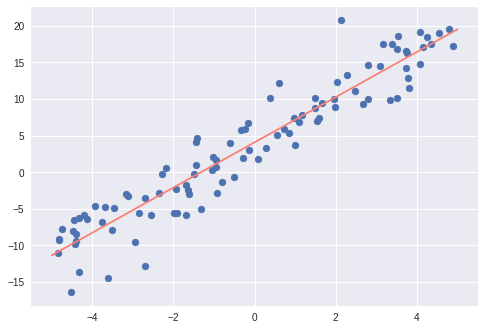

In [187]:
plt.scatter(X, y)
plt.plot([-5, 5], normal_reg.predict([-5, 5]), color="salmon");

# SVD

\begin{equation}
\Theta = X^+y
\end{equation}

* where $X^+$ is pseudoinverse (Moore-Penrose inverse) of $X$
* $X^+ = U\sum^+ V^T$ 

In [193]:
class SVDLinearRegression:
    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta_ = np.linalg.pinv(X_b).dot(y)
        
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [195]:
svd_lin_reg = SVDLinearRegression()
svd_lin_reg.fit(X, y)
svd_lin_reg.theta_

array([[4.08606881],
       [3.08787666]])

# Gradient Descent

\begin{equation}
gradient = \frac{2}{m} X^T(X\Theta - y)
\end{equation}

\begin{equation}
\Theta = \Theta - \eta * gradient
\end{equation}

In [279]:
class GradientDescentRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        
    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta_ = np.random.randn(len(X_b[0]), 1)
        
        for _ in range(self.n_epochs):
            m = len(X)
            gradient = 2 / m * X_b.T.dot(X_b.dot(self.theta_) - y)
            self.theta_ = self.theta_ - self.learning_rate * gradient
            
    def partial_fit(self, X, y, n_epochs=1):
        X_b = np.c_[np.ones((len(X), 1)), X]
        
        # if theta doesn't exist, create it
        try:
            self.theta_
        except AttributeError as e:
            self.theta_ = np.random.randn(len(X_b[0]), 1)
        
        for _ in range(n_epochs):
            m = len(X)
            gradient = 2 / m * X_b.T.dot(X_b.dot(self.theta_) - y)
            self.theta_ = self.theta_ - self.learning_rate * gradient
            
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta_)

In [266]:
gd_reg = GradientDescentRegression(learning_rate=0.1, n_epochs=10)
gd_reg.fit(X, y)
gd_reg.theta_

array([[3.66987131],
       [2.96683864]])

# Visualizing Different Learning Rates

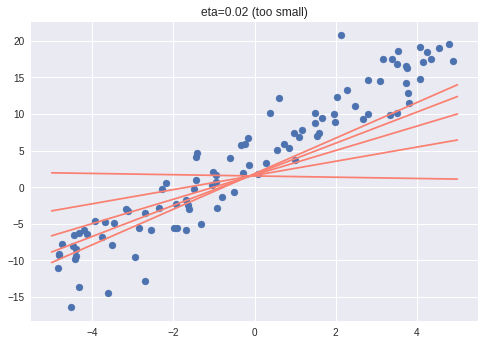

In [275]:
gd_reg = GradientDescentRegression(learning_rate=0.02)
X_test = [-5, 5]
y_pred = []

for _ in range(5):
    gd_reg.partial_fit(X, y)
    y_pred.append(gd_reg.predict(X_test))
    
plt.scatter(X, y)
for i in range(len(y_pred)):
    plt.plot(X_test, y_pred[i], color="salmon")
plt.title("eta=0.02 (too small)")
plt.show()

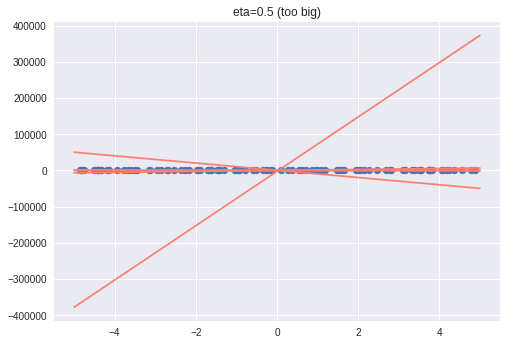

In [277]:
gd_reg = GradientDescentRegression(learning_rate=0.5)
X_test = [-5, 5]
y_pred = []

for _ in range(5):
    gd_reg.partial_fit(X, y)
    y_pred.append(gd_reg.predict(X_test))
    
plt.scatter(X, y)
for i in range(len(y_pred)):
    plt.plot(X_test, y_pred[i], color="salmon")
plt.title("eta=0.5 (too big)")
plt.show()

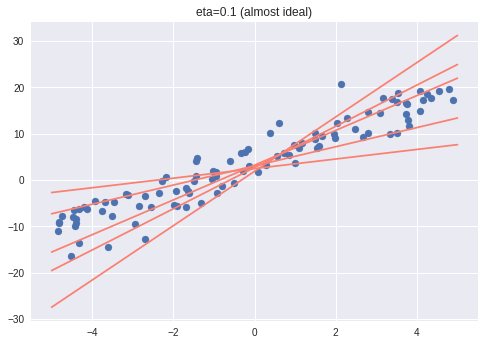

In [327]:
gd_reg = GradientDescentRegression(learning_rate=0.1)
X_test = [-5, 5]
y_pred = []

for _ in range(5):
    gd_reg.partial_fit(X, y)
    y_pred.append(gd_reg.predict(X_test))
    
plt.scatter(X, y)
for i in range(len(y_pred)):
    plt.plot(X_test, y_pred[i], color="salmon")
plt.title("eta=0.1 (almost ideal)")
plt.show()

# Logistic Regression

In [344]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from collections import Counter

iris = load_iris()
X = iris["data"][:, 2:]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [345]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.9666666666666667

In [348]:
y_pred = lr_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 13]])

# Testing L1/L2 regularization

In [469]:
m = 1000
X = np.c_[np.random.rand(m, 3) * 10 - 5, np.ones((m, 1))] 
y = (5 + 2 * X[:, :1] + 8 * X[:, 1:2] + np.random.randn(m, 1) * 5).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [470]:
from sklearn.linear_model import SGDRegressor

In [471]:
sgd = SGDRegressor(penalty=None)
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.955032220501445

In [472]:
sgd.intercept_, sgd.coef_

(array([2.41761513]), array([1.85872173, 8.17477363, 0.12715311, 2.41761513]))

In [473]:
sgd_l2 = SGDRegressor(penalty="l2")
sgd_l2.fit(X_train, y_train)
sgd_l2.score(X_test, y_test)

0.953266946910759

In [474]:
sgd_l2.intercept_, sgd_l2.coef_

(array([2.39211141]), array([1.69292466, 8.07301471, 0.09934668, 2.38892552]))

In [475]:
sgd_l1 = SGDRegressor(penalty="l1")
sgd_l1.fit(X_train, y_train)
sgd_l1.score(X_test, y_test)

0.9541466664746902

In [476]:
sgd_l1.intercept_, sgd_l1.coef_

(array([2.31389344]), array([1.79912906, 8.12590668, 0.11336104, 2.31285203]))

In [477]:
sgd_elastic_net = SGDRegressor(penalty="elasticnet", l1_ratio=0.15)
sgd_elastic_net.fit(X_train, y_train)
sgd_elastic_net.score(X_test, y_test)

0.9548558352020874

In [478]:
sgd_elastic_net.intercept_, sgd_elastic_net.coef_

(array([2.3272388]), array([1.89307492, 8.13331812, 0.13103358, 2.32545574]))

In [492]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

df = pd.DataFrame(X, columns=housing["feature_names"])
df["median_house_value"] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [526]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

pipe = Pipeline([
    ("std_scaler", StandardScaler()),
    ("regressor", SGDRegressor())
])

In [523]:
param_grid = [
    {
        "regressor__penalty": [None, "l1", "l2"],
        "regressor__learning_rate": ["constant", "optimal", "adaptive", "invscaling"],
        "regressor__early_stopping": [True, False]
    }
]

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                           scoring="neg_mean_squared_error", n_jobs=-1, cv=5)

grid_search.fit(X_train, y_train);

In [524]:
grid_search.best_params_

{'regressor__early_stopping': True,
 'regressor__learning_rate': 'invscaling',
 'regressor__penalty': None}

In [525]:
grid_search.score(X_test, y_test)

-0.523342743732945

In [527]:
np.sqrt(mean_squared_error(y_test, grid_search.predict(X_test)))

0.7234243179026711

In [530]:
import tensorflow as tf
from tensorflow import keras

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [534]:
ann = keras.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])
ann.compile(optimizer="nadam", loss="mean_squared_error")
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,
        callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 16512 samples, validate on 4128 samples
Epoch 1/100
16512/16512 [==============================] - 2s 142us/sample - loss: 181.6048 - val_loss: 3656.6592
Epoch 2/100
16512/16512 [==============================] - 1s 73us/sample - loss: 72.8956 - val_loss: 1.3512
Epoch 3/100
16512/16512 [==============================] - 1s 71us/sample - loss: 73.8871 - val_loss: 117.6205
Epoch 4/100
16512/16512 [==============================] - 1s 72us/sample - loss: 18.1535 - val_loss: 1.1462
Epoch 5/100
16512/16512 [==============================] - 1s 73us/sample - loss: 94.1209 - val_loss: 1.0561
Epoch 6/100
16512/16512 [==============================] - 1s 72us/sample - loss: 1.1639 - val_loss: 0.8338
Epoch 7/100
16512/16512 [==============================] - 1s 72us/sample - loss: 1.0996 - val_loss: 0.7520
Epoch 8/100
16512/16512 [==============================] - 1s 71us/sample - loss: 4.6994 - val_loss: 0.8039
Epoch 9/100
16512/16512 [==============================] - 1s 72us/sample -

In [535]:
mean_squared_error(y_test, ann.predict(X_test))

0.4505983776560713

In [536]:
ann = keras.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])
ann.compile(optimizer="nadam", loss="mean_squared_error")
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,
        callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 16512 samples, validate on 4128 samples
Epoch 1/100
16512/16512 [==============================] - 2s 123us/sample - loss: 182.5347 - val_loss: 1.6934
Epoch 2/100
16512/16512 [==============================] - 1s 83us/sample - loss: 7.6185 - val_loss: 1.1511
Epoch 3/100
16512/16512 [==============================] - 1s 83us/sample - loss: 9.6049 - val_loss: 17.1842
Epoch 4/100
16512/16512 [==============================] - 1s 83us/sample - loss: 7.9057 - val_loss: 0.9998
Epoch 5/100
16512/16512 [==============================] - 1s 84us/sample - loss: 3.9760 - val_loss: 0.9060
Epoch 6/100
16512/16512 [==============================] - 1s 84us/sample - loss: 2.5117 - val_loss: 0.8258
Epoch 7/100
16512/16512 [==============================] - 1s 85us/sample - loss: 7.7158 - val_loss: 1.0623
Epoch 8/100
16512/16512 [==============================] - 1s 82us/sample - loss: 0.9720 - val_loss: 1.0809
Epoch 9/100
16512/16512 [==============================] - 1s 81us/sample - loss: 0

In [537]:
mean_squared_error(y_test, ann.predict(X_test))

0.46966362721287913

In [541]:
ann = keras.Sequential([
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
ann.compile(optimizer="nadam", loss="mean_squared_error")
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100,
        callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 16512 samples, validate on 4128 samples
Epoch 1/100
16512/16512 [==============================] - 4s 242us/sample - loss: 184.9027 - val_loss: 4.3972
Epoch 2/100
16512/16512 [==============================] - 3s 158us/sample - loss: 6.5268 - val_loss: 2.6985
Epoch 3/100
16512/16512 [==============================] - 3s 160us/sample - loss: 2.6892 - val_loss: 1.7834
Epoch 4/100
16512/16512 [==============================] - 3s 158us/sample - loss: 1.8600 - val_loss: 1.3581
Epoch 5/100
16512/16512 [==============================] - 3s 160us/sample - loss: 1.5673 - val_loss: 1.3038
Epoch 6/100
16512/16512 [==============================] - 3s 157us/sample - loss: 1.4802 - val_loss: 1.2635
Epoch 7/100
16512/16512 [==============================] - 3s 157us/sample - loss: 1.3996 - val_loss: 1.1495
Epoch 8/100
16512/16512 [==============================] - 3s 159us/sample - loss: 1.2063 - val_loss: 0.9788
Epoch 9/100
16512/16512 [==============================] - 3s 159us/sample - 

In [542]:
mean_squared_error(y_test, ann.predict(X_test))

0.4554964161510966

In [551]:
y_df = pd.DataFrame(np.c_[y_test, ann.predict(X_test)], columns=["y_actual", "y_pred"])
y_df["residuals"] = y_df["y_actual"] - y_df["y_pred"]

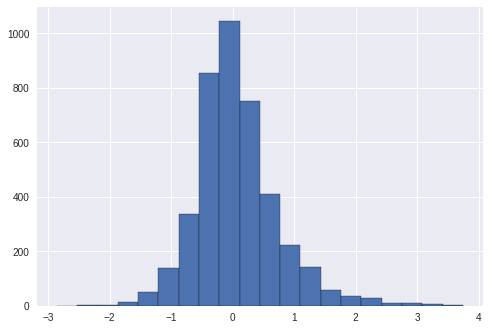

In [553]:
y_df["residuals"].hist(bins=20, edgecolor="k");

In [554]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [556]:
ann = keras.Sequential([
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])
ann.compile(optimizer="nadam", loss="mean_squared_error")
ann.fit(X_train_scaled, y_train, 
        validation_data=(X_test_scaled, y_test), batch_size=32, epochs=100,
        callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Train on 16512 samples, validate on 4128 samples
Epoch 1/100
16512/16512 [==============================] - 3s 206us/sample - loss: 0.5725 - val_loss: 0.3816
Epoch 2/100
16512/16512 [==============================] - 3s 156us/sample - loss: 0.4441 - val_loss: 0.3531
Epoch 3/100
16512/16512 [==============================] - 3s 155us/sample - loss: 0.3799 - val_loss: 0.3361
Epoch 4/100
16512/16512 [==============================] - 3s 154us/sample - loss: 0.3574 - val_loss: 0.3333
Epoch 5/100
16512/16512 [==============================] - 3s 155us/sample - loss: 0.3393 - val_loss: 0.3080
Epoch 6/100
16512/16512 [==============================] - 3s 155us/sample - loss: 0.3344 - val_loss: 0.3133
Epoch 7/100
16512/16512 [==============================] - 3s 155us/sample - loss: 0.3170 - val_loss: 0.3056
Epoch 8/100
16512/16512 [==============================] - 3s 155us/sample - loss: 0.3127 - val_loss: 0.3005
Epoch 9/100
16512/16512 [==============================] - 3s 155us/sample - lo

In [557]:
mean_squared_error(y_test, ann.predict(X_test_scaled))

0.2650926199350692

In [558]:
y_pred = ann.predict(X_test_scaled)
np.c_[y_test, y_pred]

array([[1.455     , 1.2123034 ],
       [0.9       , 1.01620841],
       [3.712     , 3.63089943],
       ...,
       [2.413     , 2.64254045],
       [2.021     , 1.8609643 ],
       [1.807     , 2.00548172]])

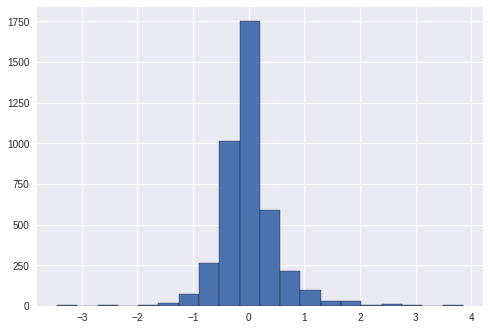

In [560]:
y_df = pd.DataFrame(np.c_[y_test, y_pred], columns=["y_actual", "y_pred"])
y_df["residuals"] = y_df["y_actual"] - y_df["y_pred"]
y_df["residuals"].hist(bins=20, edgecolor="k");

In [578]:
from sklearn.ensemble import RandomForestRegressor

grid_param = [
    {
        "max_depth": [190, 200, 225, 250],
        "max_leaf_nodes": [290, 300, 325, 350]
    }
]

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid_param, 
                           cv=3, n_jobs=-1, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [579]:
grid_search.best_params_

{'max_depth': 190, 'max_leaf_nodes': 350}

In [580]:
y_pred = grid_search.predict(X_test)

In [581]:
mean_squared_error(y_test, y_pred)

0.28359716567012055

In [589]:
ann_pred = ann.predict(X_test_scaled)
random_forest_pred = grid_search.predict(X_test)
combined_pred = (ann_pred + random_forest_pred.reshape((-1, 1))) / 2
mean_squared_error(y_test, combined_pred)

0.25442242863570996

In [641]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=8, n_estimators=500, objective="reg:squarederror", 
                   subsample=0.85, colsample_bytree=0.85)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.85, verbosity=1)

In [642]:
y_pred = xgb.predict(X_test)
mean_squared_error(y_test, y_pred)

0.20290507295990912

In [643]:
np.c_[y_test, y_pred]

array([[1.455     , 1.76788568],
       [0.9       , 1.16222823],
       [3.712     , 3.65737557],
       ...,
       [2.413     , 2.76932287],
       [2.021     , 1.8729583 ],
       [1.807     , 2.31620693]])

In [649]:
xgb_pred = xgb.predict(X_test)
combined_pred = (ann_pred + xgb_pred.reshape((-1, 1))) / 2

In [650]:
mean_squared_error(y_test, combined_pred)

0.21335121628899212

In [651]:
np.c_[y_test, combined_pred]

array([[1.455     , 1.49009454],
       [0.9       , 1.08921838],
       [3.712     , 3.64413738],
       ...,
       [2.413     , 2.70593166],
       [2.021     , 1.86696124],
       [1.807     , 2.16084433]])